# ***IMPORTING LIBRARIES***

In [67]:
#importlibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# ***DATA LOADING***

In [68]:
#data loading
sonar_data = pd.read_csv('/workspaces/mid-sem-hackthon-group-6/data/sonar.all-data.csv')
sonar_data.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# ***DATA PREPROCESSING***

In [69]:
sonar_data.shape #shape of data

(208, 61)

In [70]:
sonar_data.describe().T #summary of data


,count,mean,std,min,25%,50%,75%,max
Freq_1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
Freq_2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
Freq_3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
Freq_4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
Freq_5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
Freq_6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
Freq_7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
Freq_8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
Freq_9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
Freq_10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [71]:
sonar_data.duplicated().sum() #duplicate values

0

In [72]:
sonar_data.isnull().sum() # checking null values null values

Freq_1     0
Freq_2     0
Freq_3     0
Freq_4     0
Freq_5     0
          ..
Freq_57    0
Freq_58    0
Freq_59    0
Freq_60    0
Label      0
Length: 61, dtype: int64

# ***SEPARATING TARGET VARIABLE FROM THE FEATURES***

In [73]:
X = sonar_data.iloc[:, :-1] #feature
Y = sonar_data.iloc[:, -1] #target variable
Y = np.where(Y == 'M', 1, 0)

# ***FEATURE SELECTION***

In [74]:
rf_model = RandomForestClassifier()
feature_selection = SelectFromModel(rf_model)
feature_selection.fit(X, Y)
selected_features = X.columns[feature_selection.get_support()]
selected_features

Index(['Freq_9', 'Freq_10', 'Freq_11', 'Freq_12', 'Freq_13', 'Freq_15',
       'Freq_17', 'Freq_20', 'Freq_27', 'Freq_31', 'Freq_36', 'Freq_37',
       'Freq_43', 'Freq_45', 'Freq_46', 'Freq_47', 'Freq_48', 'Freq_49',
       'Freq_51', 'Freq_52'],
      dtype='object')

# ***FEATURE SCALING***

In [75]:
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)

*HEATMAP*

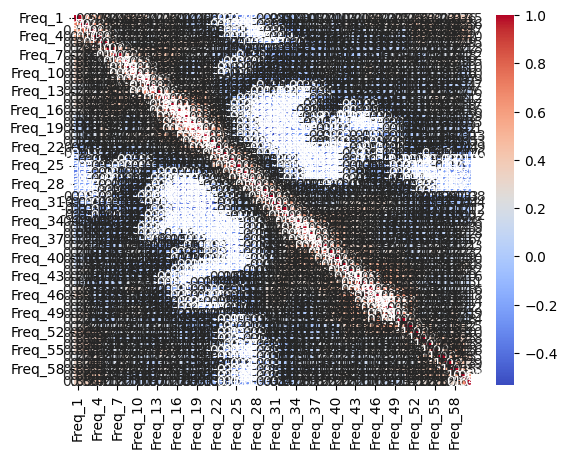

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Convert X_scaled back to a Pandas DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns) # Use the original column names

# Calculate the correlation matrix
corr_matrix = X_scaled_df.corr()

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [77]:
#defining models
lr_model = LogisticRegression()
svm_model = SVC(C=1.5, kernel='rbf', probability=True)
knn_model = KNeighborsClassifier(n_neighbors=5)


In [78]:
ensemble = VotingClassifier(estimators=[('lr', lr_model), ('svm', svm_model), ('knn', knn_model)], voting='soft')

# ***DEFINING CROSS VALIDATION***

In [79]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
accuracies = []
models = [lr_model, svm_model, knn_model]
reports = []

# ***MODEL TRAINING***

In [80]:
for train_index, test_index in kfold.split(X_scaled):
  X_train, X_test = X_scaled[train_index], X_scaled[test_index]

  if not isinstance(Y, pd.DataFrame):
    Y = pd.DataFrame(Y)

  Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

  ensemble.fit(X_train, Y_train)

  y_pred = ensemble.predict(X_test)

  accuracy = accuracy_score(Y_test, y_pred)
  accuracies.append(accuracy)
  report = classification_report(Y_test, y_pred)
  reports.append(report)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed 

**MODEL EVALUATION**

In [81]:
print(f"Fold Accuracy: {accuracy}")
print(classification_report(Y_test, y_pred))

Fold Accuracy: 0.926829268292683
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.88      1.00      0.94        22

    accuracy                           0.93        41
   macro avg       0.94      0.92      0.93        41
weighted avg       0.94      0.93      0.93        41



In [82]:
print(f"Mean Accuracy: {np.mean(accuracies)}")
print(f"Standard Deviation: {np.std(accuracies)}")

Mean Accuracy: 0.8416957026713124
Standard Deviation: 0.057174952979773354
